### 1. Import necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Load Dataset and preprocess it

In [2]:
book_data = pd.read_csv('book.csv')

In [3]:
book_data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
book_data.shape

(2000, 11)

In [6]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [7]:
book_data.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. EDA

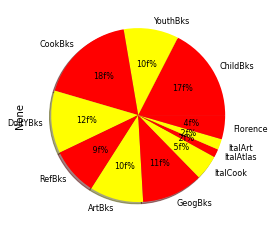

In [17]:
book_data.mean().plot(kind='pie', autopct='%2.0ff%%', fontsize='8', 
                                        colors = ['Red','yellow'], shadow =True)
plt.show()

In [19]:
book_data.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

### 4. Model Building

In [23]:
from mlxtend.frequent_patterns import apriori,association_rules

In [24]:
frequent_sets = apriori(df = book_data, min_support=0.02,use_colnames=True) #Get frequent itemsets from a one-hot DataFrame
frequent_sets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
271,0.0210,"(ArtBks, ChildBks, DoItYBks, CookBks, RefBks, ..."
272,0.0270,"(GeogBks, ChildBks, DoItYBks, CookBks, RefBks,..."
273,0.0310,"(ArtBks, GeogBks, ChildBks, DoItYBks, CookBks,..."
274,0.0225,"(ArtBks, GeogBks, ChildBks, CookBks, RefBks, Y..."


In [25]:
frequent_sets.to_csv('Frequent_itemsets.csv')

In [27]:
ass_rule = association_rules(df = frequent_sets, metric='confidence', min_threshold=0.3)
ass_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
1753,"(RefBks, ArtBks, GeogBks)","(ChildBks, DoItYBks, CookBks)",0.0565,0.1460,0.024,0.424779,2.909444,0.015751,1.484646
1754,"(RefBks, ChildBks, ArtBks)","(DoItYBks, GeogBks, CookBks)",0.0760,0.1085,0.024,0.315789,2.910502,0.015754,1.302962
1755,"(RefBks, DoItYBks, ArtBks)","(ChildBks, GeogBks, CookBks)",0.0535,0.1495,0.024,0.448598,3.000656,0.016002,1.542432
1756,"(RefBks, ArtBks, CookBks)","(ChildBks, DoItYBks, GeogBks)",0.0700,0.1045,0.024,0.342857,3.280930,0.016685,1.362717


<AxesSubplot:>

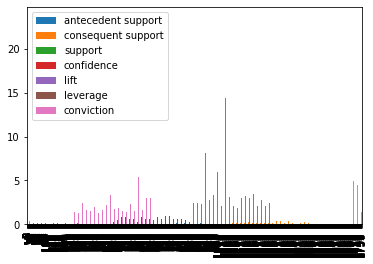

In [31]:
ass_rule.plot(kind='bar')

<AxesSubplot:>

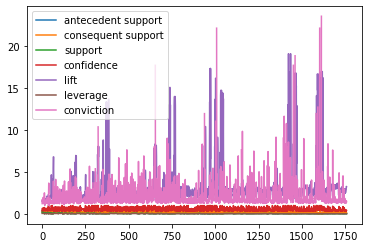

In [35]:
ass_rule.plot(kind='line')